In [2]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

npg_palette = ["#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF"]
sns.set_palette(npg_palette)

sns.set_style('white', {'axes.linewidth': 0.85})
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

In [4]:
# convert fasta file to dataframe
def convert_fasta_to_df(fasta_file):
    names = []
    descriptions = []
    sequences = []
    
    for record in SeqIO.parse(fasta_file, 'fasta'):
        names.append(record.id)
        descriptions.append(record.description)
        sequences.append(str(record.seq))
    
    dataframe = pd.DataFrame({
        'name': names,
        'description': descriptions,
        'sequence': sequences
    })
    return dataframe

# convert a dataframe with columns['name', 'sequence'] to fasta file
# specify dataframe and output file path/name as parameters
def convert_df_to_fasta(dataframe, output_file):
    records = [SeqRecord(Seq(row['sequence']), id=row['name'], description='') for index, row in dataframe.iterrows()]
    
    with open(output_file, "w") as fasta_file:
        SeqIO.write(records, fasta_file, "fasta")

In [5]:
species = ['Dmel', 'Dsim', 'Dana', 'Dvir', 'Sleb']
orf_files = [sp+'_orfs.gff' for sp in species]

In [6]:
def clean_orf(orf_file):
    sp = orf_file[:4]
    orf = convert_fasta_to_df(orf_file)

    orf['length'] = orf['sequence'].str.len()
    orf.drop('description', axis=1, inplace=True)
    print(f'original:{orf.shape}')

    orf = orf[orf['length']<=100]
    print(f'less than 100:{orf.shape}')
    
    sns.histplot(data=orf, x='length',bins=40)
    #plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, nbins=10))
    #plt.grid(True)
    
    orf_cleaned = orf.drop_duplicates(subset='sequence', keep='first')
    #convert_df_to_fasta(orf_cleaned, sp+'_orf_cleaned.fasta')
    
    print(f'clean:{orf_cleaned.shape}')
    
    return orf_cleaned

original:(2091668, 3)
less than 100:(2007848, 3)
clean:(1806861, 3)


,name,sequence,length
1,lcl|ORF2_2L:993:1037,MIAYARVVPTYCAL,14
2,lcl|ORF3_2L:1065:1100,MNEMIIYSSCR,11
3,lcl|ORF4_2L:1182:1268,MSASRSLSYITANPKRQYTTERESSGDI,28
13,lcl|ORF14_2L:5115:5213,MIAYARVVPTYCDLRFFGNPKWRRTNEMIMIR,32
14,lcl|ORF15_2L:5226:5258,MHDRESRKDN,10
...,...,...,...
2091661,lcl|ORF36_211000022279940:1740:1639,MQESVDGMHQFCRKLAESRPRLGRAPTLKCRSI,33
2091662,lcl|ORF37_211000022279940:1398:1294,MQTHWASLFRQGHLEHAQFLPQAPASWLLAASKM,34
2091664,lcl|ORF39_211000022279940:4328:4152,MLLPLPLANMEITNYTDAQTVSVYKGLGKLQISSTKIIYLIDLEQL...,58
2091666,lcl|ORF41_211000022279940:2651:2421,MAKNNVQTKNKTIYNGEKQCAQTHMGLQILPHSDFSKILTSLSITI...,76


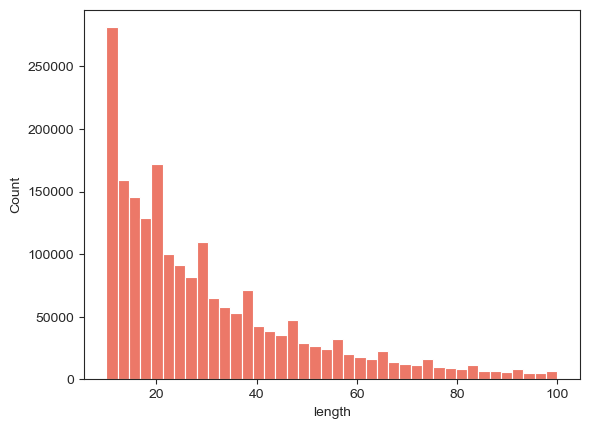

In [7]:
clean_orf('Dmel_orfs.gff')

original:(2091668, 3)
less than 100:(2007848, 3)
clean:(1806861, 3)
original:(1933950, 3)
less than 100:(1855636, 3)
clean:(1710937, 3)
original:(2938393, 3)
less than 100:(2809811, 3)
clean:(2246293, 3)
original:(2861627, 3)
less than 100:(2761635, 3)
clean:(2418275, 3)
original:(3809618, 3)
less than 100:(3699099, 3)
clean:(3186576, 3)


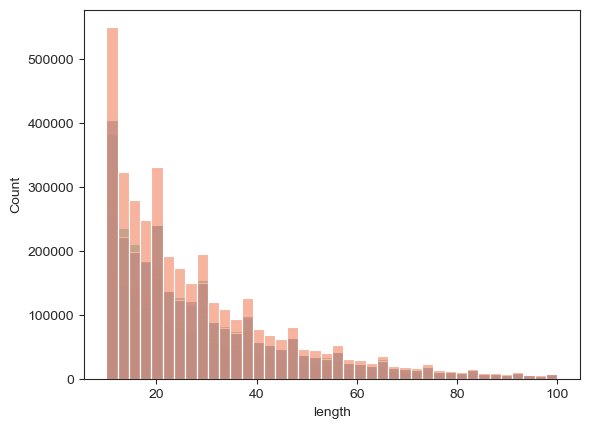

In [8]:
clean_orfs = {}
for i, sp in enumerate(species):
    #print(sp, orf_files[i])
    clean_orfs[sp] = clean_orf(orf_files[i])

In [9]:
for i, sp in enumerate(species):
    print(sp, clean_orfs[sp].shape)

Dmel (1806861, 3)
Dsim (1710937, 3)
Dana (2246293, 3)
Dvir (2418275, 3)
Sleb (3186576, 3)


In [10]:
import peptides

In [15]:
test = clean_orfs['Dmel'].iloc[:100000,:]
testseq = test['sequence'].to_list()

In [11]:
dmel_cand = pd.read_csv("dmel_combined_output.gff3", sep = "\t", header=None)

In [12]:
clean_orfs['Dmel']

,name,sequence,length
1,lcl|ORF2_2L:993:1037,MIAYARVVPTYCAL,14
2,lcl|ORF3_2L:1065:1100,MNEMIIYSSCR,11
3,lcl|ORF4_2L:1182:1268,MSASRSLSYITANPKRQYTTERESSGDI,28
13,lcl|ORF14_2L:5115:5213,MIAYARVVPTYCDLRFFGNPKWRRTNEMIMIR,32
14,lcl|ORF15_2L:5226:5258,MHDRESRKDN,10
...,...,...,...
2091661,lcl|ORF36_211000022279940:1740:1639,MQESVDGMHQFCRKLAESRPRLGRAPTLKCRSI,33
2091662,lcl|ORF37_211000022279940:1398:1294,MQTHWASLFRQGHLEHAQFLPQAPASWLLAASKM,34
2091664,lcl|ORF39_211000022279940:4328:4152,MLLPLPLANMEITNYTDAQTVSVYKGLGKLQISSTKIIYLIDLEQL...,58
2091666,lcl|ORF41_211000022279940:2651:2421,MAKNNVQTKNKTIYNGEKQCAQTHMGLQILPHSDFSKILTSLSITI...,76


In [13]:
dmel_cand_df = dmel_cand.merge(clean_orfs['Dmel'], left_on=0, right_on='name', how='left')

In [20]:
convert_df_to_fasta(dmel_cand_df, 'dmel_cand.fasta')

In [14]:
def calculate_property(df_seq):
    pep = pd.DataFrame([(peptides.Peptide(s).isoelectric_point(), peptides.Peptide(s).charge(7.0), peptides.Peptide(s).boman(), \
                         peptides.Peptide(s).aliphatic_index(), peptides.Peptide(s).instability_index(), \
                         peptides.Peptide(s).hydrophobic_moment(), peptides.Peptide(s).hydrophobicity()) for s in df_seq],
                       columns=['Isoelectric Point', 'Charge', 'Boman Index', 'Aliphatic index', 'Instability_index', 'hydrophobic_moment',\
                               'hydrophobicity'])
    return pep

In [15]:
dmel_cand_seq = dmel_cand_df['sequence'].to_list()
dmel_cand_pep = calculate_property(dmel_cand_seq)

In [16]:
dmel_cand_df

,0,1,2,3,4,5,6,7,8,name,sequence,length
0,lcl|ORF220245_2L:6090755:6090651,SignalP-6.0,signal_peptide,1,29,0.80,.,.,.,lcl|ORF220245_2L:6090755:6090651,MLKYKSFGEGRFKKLYRLSLLLCLNVYSAGCALN,34
1,lcl|ORF29417_2L:11631543:11631611,SignalP-6.0,signal_peptide,1,20,0.57,.,.,.,lcl|ORF29417_2L:11631543:11631611,MLVLLCGCIGPKKWADSTRHKF,22
2,lcl|ORF270498_2R:15440319:15440269,SignalP-6.0,signal_peptide,1,7,0.73,.,.,.,lcl|ORF270498_2R:15440319:15440269,MLFMILAGCQMKKLKY,16
3,lcl|ORF115762_2R:22412890:22412994,SignalP-6.0,signal_peptide,1,18,0.80,.,.,.,lcl|ORF115762_2R:22412890:22412994,MSFVFTIFLRIKFVALLVSCFNFKHNLNIGQQLQ,34
4,lcl|ORF176502_2L:23325452:23325508,SignalP-6.0,signal_peptide,1,10,0.54,.,.,.,lcl|ORF176502_2L:23325452:23325508,MRIYICTYMCACCVRRRF,18
...,...,...,...,...,...,...,...,...,...,...,...,...
112,lcl|ORF167821_2L:19748741:19748815,SignalP-6.0,signal_peptide,1,22,0.95,.,.,.,lcl|ORF167821_2L:19748741:19748815,MGVTLFAGFSRRRGMVGGVGGLSG,24
113,lcl|ORF3296_2L:1316823:1316906,SignalP-6.0,signal_peptide,1,23,0.93,.,.,.,lcl|ORF3296_2L:1316823:1316906,MDLRGLKWLRRFVCFILLLLKISSCAP,27
114,lcl|ORF264297_3R:21104169:21104104,SignalP-6.0,signal_peptide,1,19,0.55,.,.,.,lcl|ORF264297_3R:21104169:21104104,MRCIRSLSWLTFSCMPSWAKM,21
115,lcl|ORF122863_X:2356235:2356318,SignalP-6.0,signal_peptide,1,10,0.66,.,.,.,lcl|ORF122863_X:2356235:2356318,MISVIIVMIIGCQRFASGRLERSFRGK,27


In [24]:
pep = calculate_property(testseq)

In [27]:
pep2 = dmel_cand_pep

In [35]:
amp = pd.read_csv('amp_uniq_sig.csv')
amp_seq = amp['sequence'].to_list()
noneamp = pd.read_csv('unipro_insects_noimmune_uniq_simple.csv')
noneamp_seq = noneamp['SQ'].to_list()

In [36]:
amp_ppt = calculate_property(amp_seq)
noneamp_ppt = calculate_property(noneamp_seq)

<Axes: xlabel='Isoelectric Point', ylabel='Density'>

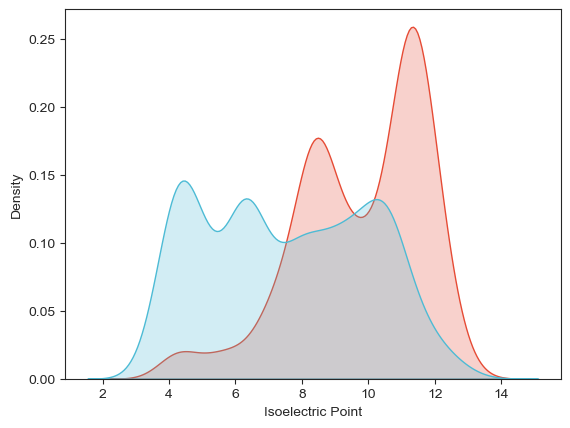

In [37]:
sns.kdeplot(data=amp_ppt, x='Isoelectric Point', fill=True)
sns.kdeplot(data=noneamp_ppt, x='Isoelectric Point', fill=True)

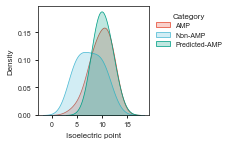

In [93]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.kdeplot(data=amp_ppt, x='Isoelectric Point', label='AMP', fill=True, lw=0.75, bw_adjust=3)
sns.kdeplot(data=noneamp_ppt, x='Isoelectric Point', label='Non-AMP', fill=True, lw=0.75, bw_adjust=3)
sns.kdeplot(data=dmel_cand_pep, x='Isoelectric Point', label='Predicted-AMP', fill=True, lw=0.75, bw_adjust=3)
#plt.title('Isoelectric point', size=8)
plt.xlabel('Isoelectric point',size=8)
plt.ylabel('Density', size=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
# plt.legend()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Category", fontsize=7, title_fontsize=8, markerscale=0.8, 
#                 frameon=False)
#plt.savefig('Isoelectric Point_dmel_cand.svg', dpi=300)

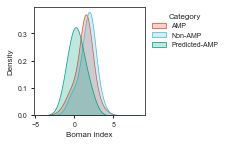

In [100]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.kdeplot(data=amp_ppt, x='Boman Index', label='AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=noneamp_ppt, x='Boman Index', label='Non-AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=dmel_cand_pep, x='Boman Index', label='Predicted-AMP', fill=True, lw=0.75, bw_adjust=2)
plt.xlabel('Boman index',size=8)
plt.ylabel('Density', size=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
# plt.legend()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Category", fontsize=7, title_fontsize=8, markerscale=0.8, 
#                 frameon=False)
plt.savefig('Boman Index_dmel_cand.svg', dpi=300)

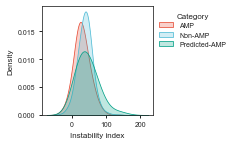

In [101]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.kdeplot(data=amp_ppt, x='Instability_index', label='AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=noneamp_ppt, x='Instability_index', label='Non-AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=dmel_cand_pep, x='Instability_index', label='Predicted-AMP', fill=True, lw=0.75, bw_adjust=2)
plt.xlabel('Instability index',size=8)
plt.ylabel('Density', size=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
plt.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Category", fontsize=7, title_fontsize=8, markerscale=0.8, 
                frameon=False)
plt.savefig('Instability_index_dmel_cand.svg', dpi=300)

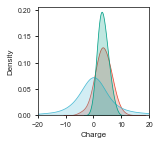

In [106]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.kdeplot(data=amp_ppt, x='Charge', label='AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=noneamp_ppt, x='Charge', label='Non-AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=dmel_cand_pep, x='Charge', label='Predicted-AMP', fill=True, lw=0.75, bw_adjust=2)
plt.xlabel('Charge',size=8)
plt.ylabel('Density', size=8)
plt.xlim(-20, 20)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
#plt.legend()
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Category", fontsize=7, title_fontsize=8, markerscale=0.8, 
#                frameon=False)
plt.savefig('Charge_dmel_cand.svg', dpi=300)

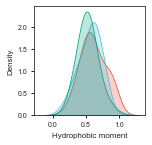

In [114]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.kdeplot(data=amp_ppt, x='hydrophobic_moment', label='AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=noneamp_ppt, x='hydrophobic_moment', label='Non-AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=dmel_cand_pep, x='hydrophobic_moment', label='Predicted-AMP', fill=True, lw=0.75, bw_adjust=2)
plt.xlabel('Hydrophobic moment',size=8)
plt.ylabel('Density', size=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
#plt.legend()
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Category", fontsize=7, title_fontsize=8, markerscale=0.8, 
#                frameon=False)
plt.savefig('hydrophobic_moment_dmel_cand.svg', dpi=300)

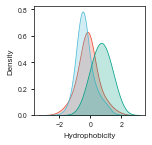

In [113]:
fig, ax = plt.subplots(figsize=(2, 2))
sns.kdeplot(data=amp_ppt, x='hydrophobicity', label='AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=noneamp_ppt, x='hydrophobicity', label='Non-AMP', fill=True, lw=0.75, bw_adjust=2)
sns.kdeplot(data=dmel_cand_pep, x='hydrophobicity', label='Predicted-AMP', fill=True, lw=0.75, bw_adjust=2)
plt.xlabel('Hydrophobicity',size=8)
plt.ylabel('Density', size=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
#plt.legend()
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title="Category", fontsize=7, title_fontsize=8, markerscale=0.8, 
#                frameon=False)
plt.savefig('hydrophobicity_dmel_cand.svg', dpi=300)

In [387]:
pred = {}
for sp in species:
    pred[sp] = pd.read_csv('prediction.gz/'+sp+'_out.prediction.gz', sep='\t', skiprows=1)
    pred[sp].rename(columns={'Access': 'name', 'Sequence': 'sequence'}, inplace=True)
    pred[sp]['length'] = pred[sp]['sequence'].str.len()
    convert_df_to_fasta(pred[sp], sp+'_pred.fasta')
    pred[sp][['name', 'length']].to_csv('orf_blastp/'+sp+'_protein_ids_w_len.txt', index=False, header=False)
#dmel_pred = pd.read_csv('Dmel_out.prediction.gz', sep='\t', skiprows=1)
#dmel_pred.rename(columns={'Access': 'name', 'Sequence': 'sequence'}, inplace=True)
#dmel_pred['length'] = dmel_pred['sequence'].str.len()
#convert_df_to_fasta(dmel_pred, 'dmel_pred.fasta')
#dmel_pred_len = dmel_pred[['name', 'length']]
#dmel_pred_len.to_csv('orf_blastp/dmel_protein_ids_w_len.txt', index=False, header=False)

In [266]:
test = dmel_pred#.sample(n=10000)
testseq = test['Sequence'].to_list()
pep2 = calculate_property(testseq)

In [17]:
# from blastp results, exclude protein queries that have hits (bitscore>100&qmatch_percent>40%)
# return a dataframe with proteins that don't have hits that meet the criteria
def process_blastp(sp):
    # read blastp output file into dataframe
    file_path = 'orf_blastp/'+sp+'_blastp.out'
    columns=['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
    df = pd.read_csv(file_path, sep='\t', names=columns, header=None)

    # read a file containing protein id and protein length
    length_file_path = 'orf_blastp/'+sp+'_protein_ids_w_len.txt'
    columns = ['qseqid', 'q_length']
    length = pd.read_csv(length_file_path, sep=',', names=columns, header=None)
    
    # add qurey protein length info and calculate query match
    df['qmatch_length'] = df['qend'] - df['qstart'] + 1
    df = pd.merge(df, length[['qseqid', 'q_length']], on='qseqid', how='left')
    df['qmatch_percent'] = df['qmatch_length'] / df['q_length']
    df['seq_identity'] = df['pident'] * df['length'] / df['q_length'] / 100

    # # select hits with percent of match in query greater than 40%
    # df_bit100_qmatch40 = df_bit100[df_bit100['qmatch_percent'] >= 0.4]
    
    df_bit40_seqid30 = df[(df['bitscore']>40) & (df['seq_identity']>0.3)]
    df_bit40_seqid30_left = df[(df['bitscore']<40) | (df['seq_identity']<0.3)]
    
    return df_bit40_seqid30

In [18]:
pred_blastp = {}
no_hits_df = {}
def keep_no_hits(sp):
    pred_blastp[sp] = process_blastp(sp)
    idx = pred_blastp[sp].groupby('qseqid')['bitscore'].idxmax()
    pred_blastp_max_bitscore = pred_blastp[sp].loc[idx]
    no_hits = pd.merge(pred[sp], pred_blastp_max_bitscore['qseqid'], left_on='name', right_on='qseqid', how='left')
    no_hits = no_hits[no_hits['qseqid'].isnull()]
    no_hits.drop(['qseqid'], axis=1, inplace=True)
    convert_df_to_fasta(no_hits, 'no_hits/'+sp+'_no_hits.fasta')
    return no_hits

In [426]:
for sp in species:
    no_hits_df[sp] = keep_no_hits(sp)

In [19]:
column_names = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
dmel_gtf = pd.read_csv("dmel-all-r6.48.gtf", sep = "\t", names=column_names, header=None)

In [20]:
dmel_cand_df

,0,1,2,3,4,5,6,7,8,name,sequence,length
0,lcl|ORF220245_2L:6090755:6090651,SignalP-6.0,signal_peptide,1,29,0.80,.,.,.,lcl|ORF220245_2L:6090755:6090651,MLKYKSFGEGRFKKLYRLSLLLCLNVYSAGCALN,34
1,lcl|ORF29417_2L:11631543:11631611,SignalP-6.0,signal_peptide,1,20,0.57,.,.,.,lcl|ORF29417_2L:11631543:11631611,MLVLLCGCIGPKKWADSTRHKF,22
2,lcl|ORF270498_2R:15440319:15440269,SignalP-6.0,signal_peptide,1,7,0.73,.,.,.,lcl|ORF270498_2R:15440319:15440269,MLFMILAGCQMKKLKY,16
3,lcl|ORF115762_2R:22412890:22412994,SignalP-6.0,signal_peptide,1,18,0.80,.,.,.,lcl|ORF115762_2R:22412890:22412994,MSFVFTIFLRIKFVALLVSCFNFKHNLNIGQQLQ,34
4,lcl|ORF176502_2L:23325452:23325508,SignalP-6.0,signal_peptide,1,10,0.54,.,.,.,lcl|ORF176502_2L:23325452:23325508,MRIYICTYMCACCVRRRF,18
...,...,...,...,...,...,...,...,...,...,...,...,...
112,lcl|ORF167821_2L:19748741:19748815,SignalP-6.0,signal_peptide,1,22,0.95,.,.,.,lcl|ORF167821_2L:19748741:19748815,MGVTLFAGFSRRRGMVGGVGGLSG,24
113,lcl|ORF3296_2L:1316823:1316906,SignalP-6.0,signal_peptide,1,23,0.93,.,.,.,lcl|ORF3296_2L:1316823:1316906,MDLRGLKWLRRFVCFILLLLKISSCAP,27
114,lcl|ORF264297_3R:21104169:21104104,SignalP-6.0,signal_peptide,1,19,0.55,.,.,.,lcl|ORF264297_3R:21104169:21104104,MRCIRSLSWLTFSCMPSWAKM,21
115,lcl|ORF122863_X:2356235:2356318,SignalP-6.0,signal_peptide,1,10,0.66,.,.,.,lcl|ORF122863_X:2356235:2356318,MISVIIVMIIGCQRFASGRLERSFRGK,27


In [21]:
dmel_gtf['feature'].unique()

array(['gene', 'mRNA', '5UTR', 'exon', 'start_codon', 'CDS', 'stop_codon',
       '3UTR', 'tRNA', 'pseudogene', 'snoRNA', 'ncRNA', 'snRNA', 'rRNA',
       'pre_miRNA', 'miRNA'], dtype=object)

In [22]:
dmel_cand_df['chr'] = dmel_cand_df['name'].str.split('_').str[1].str.split(':').str[0]
dmel_cand_df['start'] = dmel_cand_df['name'].str.split(':').str[1]
dmel_cand_df['end'] = dmel_cand_df['name'].str.split(':').str[2]

In [23]:
dmel_cand_df['strand'] = dmel_cand_df.apply(
    lambda row: '+' if row['start'] < row['end'] else ('-' if row['start'] > row['end'] else '.'), axis=1
)

dmel_cand_df['start'] = dmel_cand_df['start'].astype(int)
dmel_cand_df['end'] = dmel_cand_df['end'].astype(int)
dmel_cand_df['start'] = dmel_cand_df.apply(lambda row: row['start'] - 1 if row['strand'] == '+' else row['start'], axis=1)
dmel_cand_df['end'] = dmel_cand_df.apply(lambda row: row['end'] - 1 if row['strand'] == '-' else row['end'], axis=1)

dmel_cand_df.loc[dmel_cand_df['strand'] == '-', ['start', 'end']] = dmel_cand_df.loc[dmel_cand_df['strand'] == '-', ['end', 'start']].values

In [24]:
dmel_cand_df_bed = dmel_cand_df[['chr', 'start', 'end']]

In [25]:
dmel_cand_df_bed.columns

Index(['chr', 'start', 'end'], dtype='object')

In [171]:
dmel_cand_df_bed.to_csv('dmel_cand_df.bed', sep='\t', header=False, index=False)

In [26]:
dmel_cand_df

,0,1,2,3,4,5,6,7,8,name,sequence,length,chr,start,end,strand
0,lcl|ORF220245_2L:6090755:6090651,SignalP-6.0,signal_peptide,1,29,0.80,.,.,.,lcl|ORF220245_2L:6090755:6090651,MLKYKSFGEGRFKKLYRLSLLLCLNVYSAGCALN,34,2L,6090650,6090755,-
1,lcl|ORF29417_2L:11631543:11631611,SignalP-6.0,signal_peptide,1,20,0.57,.,.,.,lcl|ORF29417_2L:11631543:11631611,MLVLLCGCIGPKKWADSTRHKF,22,2L,11631542,11631611,+
2,lcl|ORF270498_2R:15440319:15440269,SignalP-6.0,signal_peptide,1,7,0.73,.,.,.,lcl|ORF270498_2R:15440319:15440269,MLFMILAGCQMKKLKY,16,2R,15440268,15440319,-
3,lcl|ORF115762_2R:22412890:22412994,SignalP-6.0,signal_peptide,1,18,0.80,.,.,.,lcl|ORF115762_2R:22412890:22412994,MSFVFTIFLRIKFVALLVSCFNFKHNLNIGQQLQ,34,2R,22412889,22412994,+
4,lcl|ORF176502_2L:23325452:23325508,SignalP-6.0,signal_peptide,1,10,0.54,.,.,.,lcl|ORF176502_2L:23325452:23325508,MRIYICTYMCACCVRRRF,18,2L,23325451,23325508,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,lcl|ORF167821_2L:19748741:19748815,SignalP-6.0,signal_peptide,1,22,0.95,.,.,.,lcl|ORF167821_2L:19748741:19748815,MGVTLFAGFSRRRGMVGGVGGLSG,24,2L,19748740,19748815,+
113,lcl|ORF3296_2L:1316823:1316906,SignalP-6.0,signal_peptide,1,23,0.93,.,.,.,lcl|ORF3296_2L:1316823:1316906,MDLRGLKWLRRFVCFILLLLKISSCAP,27,2L,1316822,1316906,+
114,lcl|ORF264297_3R:21104169:21104104,SignalP-6.0,signal_peptide,1,19,0.55,.,.,.,lcl|ORF264297_3R:21104169:21104104,MRCIRSLSWLTFSCMPSWAKM,21,3R,21104103,21104169,-
115,lcl|ORF122863_X:2356235:2356318,SignalP-6.0,signal_peptide,1,10,0.66,.,.,.,lcl|ORF122863_X:2356235:2356318,MISVIIVMIIGCQRFASGRLERSFRGK,27,X,2356234,2356318,+


In [106]:
dmel_cand_df1 = dmel_cand_df

In [63]:
dmel_gtf

,seqname,source,feature,start,end,score,strand,frame,attribute
0,X,FlyBase,gene,19961297,19969323,.,+,.,"gene_id ""FBgn0031081""; gene_symbol ""Nep3"";"
1,X,FlyBase,mRNA,19961689,19968479,.,+,.,"gene_id ""FBgn0031081""; gene_symbol ""Nep3""; tra..."
2,X,FlyBase,5UTR,19961689,19961845,.,+,.,"gene_id ""FBgn0031081""; gene_symbol ""Nep3""; tra..."
3,X,FlyBase,exon,19961689,19961845,.,+,.,"gene_id ""FBgn0031081""; gene_symbol ""Nep3""; tra..."
4,X,FlyBase,exon,19963955,19964071,.,+,.,"gene_id ""FBgn0031081""; gene_symbol ""Nep3""; tra..."
...,...,...,...,...,...,...,...,...,...
549156,2L,FlyBase,CDS,814243,815221,.,-,0,"gene_id ""FBgn0031281""; gene_symbol ""Saf6""; tra..."
549157,2L,FlyBase,CDS,813951,814184,.,-,2,"gene_id ""FBgn0031281""; gene_symbol ""Saf6""; tra..."
549158,2L,FlyBase,CDS,813460,813893,.,-,2,"gene_id ""FBgn0031281""; gene_symbol ""Saf6""; tra..."
549159,2L,FlyBase,stop_codon,813457,813459,.,-,0,"gene_id ""FBgn0031281""; gene_symbol ""Saf6""; tra..."


In [27]:
def check_overlap(feature1, feature2):
    return feature1['start'] <= feature2['end'] and feature1['end'] >= feature2['start']

In [41]:
# Merge only rows where chr in dmel_cand_df matches seqname in dmel_gtf
merged = dmel_cand_df.merge(dmel_gtf, left_on='chr', right_on='seqname', how='inner', suffixes=('_cand', '_gtf'))
merged = merged.drop_duplicates()

# Step 2: Check overlaps
merged['overlaps'] = (merged['start_cand'] <= merged['end_gtf']) & (merged['end_cand'] >= merged['start_gtf'])

In [29]:
def categorize_region(group):
    annotations = set(group['feature'])
    return annotations

In [30]:
feature_annotation_dict = {
    frozenset(['mRNA', 'gene']): "intron",
    frozenset(['mRNA', 'gene', 'CDS', 'exon']): "CDS",
    frozenset(['mRNA', 'gene', '3UTR', 'exon']): "3UTR",
    frozenset(['ncRNA', 'gene']): "ncRNA",
    frozenset(['mRNA', 'start_codon', 'gene', 'CDS', '5UTR', 'exon']): "CDS",
    frozenset(['mRNA', 'gene', '5UTR', 'exon']): "5UTR",
    frozenset(['ncRNA', 'gene', 'exon']): "ncRNA",
    frozenset(['mRNA', 'stop_codon', 'gene', 'CDS', 'exon', '3UTR']): "CDS",
    frozenset(['mRNA', 'gene', 'CDS', 'exon', '3UTR']): "CDS", # why no stop_codon? isofrom1: CDS isoform2:3UTR
    frozenset(['mRNA', 'start_codon', 'gene', 'CDS', 'exon']): "CDS",
    frozenset(['mRNA', 'stop_codon', 'gene', 'exon', '3UTR']): "3UTR",
    frozenset(['mRNA', 'gene', 'CDS', '5UTR', 'exon']): "CDS"
}

In [31]:
# keep only overlapping rows
overlapping = merged[merged['overlaps']].copy()
overlapping['gene_id'] = overlapping['attribute'].str.extract(r'gene_id\s*"([^"]+)"')

#overlapping['feature_annotation']
annotations = overlapping.groupby(['name', 'gene_id']).apply(categorize_region).reset_index()
overlapping = overlapping.merge(annotations, on=['name', 'gene_id'], how='left')

overlapping['annotation'] = overlapping['0_y'].apply(
    lambda x: feature_annotation_dict.get(frozenset(x), 'Other')  # Default to 'Other' if not found
)
overlapping = overlapping.drop_duplicates(subset=['name', 'gene_id'], keep='first')

/var/folders/jt/wf6lflrs1_94wjjrq_r5mrvm0000gn/T/ipykernel_5075/2482916728.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annotations = overlapping.groupby(['name', 'gene_id']).apply(categorize_region).reset_index()


In [32]:
overlapping[overlapping['name']=='lcl|ORF111864_2R:20832379:20832444']

,0_x,1,2,3,4,5,6,7,8,name,...,start_gtf,end_gtf,score,strand_gtf,frame,attribute,overlaps,gene_id,0_y,annotation
136,lcl|ORF111864_2R:20832379:20832444,SignalP-6.0,signal_peptide,1,19,0.85,.,.,.,lcl|ORF111864_2R:20832379:20832444,...,20821262,20836028,.,-,.,"gene_id ""FBgn0011674""; gene_symbol ""insc"";",True,FBgn0011674,"{gene, mRNA}",intron
138,lcl|ORF111864_2R:20832379:20832444,SignalP-6.0,signal_peptide,1,19,0.85,.,.,.,lcl|ORF111864_2R:20832379:20832444,...,20827282,20836028,.,-,.,"gene_id ""FBgn0016984""; gene_symbol ""sktl"";",True,FBgn0016984,"{gene, mRNA, 5UTR, exon}",5UTR


In [ ]:
non_overlapping = merged[~merged['overlaps']].copy()
non_overlapping = non_overlapping[(non_overlapping['feature'] == 'gene') & (~non_overlapping['name'].isin(overlapping['name']))]

# calculate distance between each pair
non_overlapping['distance'] = non_overlapping.apply(
    lambda row: min(abs(row['start_cand'] - row['end_gtf']), abs(row['end_cand'] - row['start_gtf'])), axis=1
)

non_overlapping['gene_id'] = non_overlapping['attribute'].str.extract(r'gene_id\s*"([^"]+)"')

# Select only the closest row; add "include_groups=False" to groupby in future
closest = non_overlapping.groupby('name').apply(lambda x: x.nsmallest(1, 'distance')).reset_index(drop=True)  

final_df = pd.concat([overlapping, closest]).sort_values(by='name')
# final_df = final_df[['name', 'start_cand', 'end_cand', 'attribute', 'feature', 'start_gtf', 'end_gtf'
#                      , 'chr', 'overlaps', 'gene_id', 'distance', 'annotation']]
final_df = final_df.groupby('name', as_index=False).first()
final_df.loc[final_df['overlaps']!=True, 'annotation'] = 'nongenic'

/var/folders/jt/wf6lflrs1_94wjjrq_r5mrvm0000gn/T/ipykernel_5075/798764073.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closest = non_overlapping.groupby('name', group_keys=True).apply(lambda x: x.nsmallest(1, 'distance')).reset_index(drop=True)


In [59]:
final_df.to_csv('dmel_cand_df_with_SP.csv', index=False)

In [34]:
final_df.head()

,name,0_x,1,2,3,4,5,6,7,8,...,score,strand_gtf,frame,attribute,overlaps,gene_id,0_y,annotation,0,distance
0,lcl|ORF103115_3L:13595920:13595994,lcl|ORF103115_3L:13595920:13595994,SignalP-6.0,signal_peptide,1,16,0.84,.,.,.,...,.,-,.,"gene_id ""FBgn0264001""; gene_symbol ""bru3"";",True,FBgn0264001,"{gene, mRNA}",intron,None,NaN
1,lcl|ORF103582_X:18052114:18052188,lcl|ORF103582_X:18052114:18052188,SignalP-6.0,signal_peptide,1,17,0.60,.,.,.,...,.,-,.,"gene_id ""FBgn0003380""; gene_symbol ""Sh"";",True,FBgn0003380,"{gene, mRNA}",intron,None,NaN
2,lcl|ORF109718_3L:16251277:16251354,lcl|ORF109718_3L:16251277:16251354,SignalP-6.0,signal_peptide,1,15,0.80,.,.,.,...,.,-,.,"gene_id ""FBgn0036583""; gene_symbol ""CG13055"";",True,FBgn0036583,"{gene, mRNA, CDS, exon}",CDS,None,NaN
3,lcl|ORF111592_3L:17042290:17042391,lcl|ORF111592_3L:17042290:17042391,SignalP-6.0,signal_peptide,1,24,0.94,.,.,.,...,.,-,.,"gene_id ""FBgn0261872""; gene_symbol ""scaf6"";",True,FBgn0261872,"{gene, mRNA}",intron,None,NaN
4,lcl|ORF111864_2R:20832379:20832444,lcl|ORF111864_2R:20832379:20832444,SignalP-6.0,signal_peptide,1,19,0.85,.,.,.,...,.,-,.,"gene_id ""FBgn0016984""; gene_symbol ""sktl"";",True,FBgn0016984,"{gene, mRNA, 5UTR, exon}",5UTR,None,NaN


In [350]:
npg_palette2 = ["#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF", "#4DBBD599"]

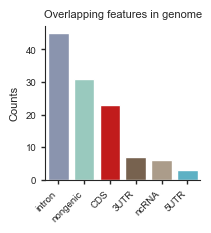

In [351]:
# plot distribution of feature source (some ORFs overlap with multiple genes, would count twice here)
plt.figure(figsize=(2, 2))
feature_counts = final_df['annotation'].value_counts()
ax = sns.barplot(x=feature_counts.index, y=feature_counts.values, hue=feature_counts.index, palette=npg_palette2, legend=False)

# Customizing labels and appearance
plt.xlabel("", fontsize=8)
plt.ylabel("Counts", fontsize=8)
plt.title("Overlapping features in genome", fontsize=8)
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
plt.xticks(rotation=45, ha="right")

sns.despine()  # Remove top and right spines
#plt.show()
plt.savefig("overlap_feature_source.svg", dpi=300)

In [58]:
final_df['overlaps'].value_counts()

overlaps
True     84
False    31
Name: count, dtype: int64

In [357]:
# overlap gene ids 
gene_id_list = final_df.loc[final_df['overlaps']==True, 'gene_id']
gene_id_list.to_csv('overlap_gene_ids.txt', index=False, header=None)

In [372]:
# overlap gene ids
gene_id_list = final_df.loc[final_df['overlaps']!=True, 'gene_id']
gene_id_list.to_csv('nooverlap_gene_ids.txt', index=False, header=None)

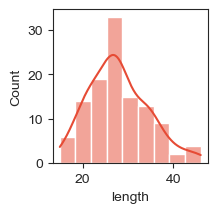

In [387]:
plt.figure(figsize=(2, 2))
ax = sns.histplot(final_df['length'], kde=True)

In [397]:
have_overlap = final_df.loc[final_df['overlaps']==True,:]

In [478]:
expr_pr = pd.read_csv('/Users/cong/Documents/Zhao_Lab/manuscript/figures/conserve/ef_TPM/Dmel_comb_TPM.txt', sep='\t', header=0)

In [479]:
expr_pr

,Gene ID,Gene Name,Reference,Strand,Start,End,Coverage,FPKM,TPM,TPM.1,TPM.2,TPM.3,TPM.4,TPM.5,TPM.6,TPM.7,TPM.8
0,FBgn0000003,-,3R,+,6822500,6822798,126.14,11.24,22.22,28.54,28.23,85.11,203.49,27.17,123.52,9.83,13.97
1,FBgn0000008,-,2R,+,22136968,22172834,62.06,6.24,12.34,12.42,12.29,8.38,8.67,8.50,8.24,8.52,8.64
2,FBgn0000014,-,3R,-,16807214,16830049,16.97,1.70,3.36,3.21,2.74,2.77,2.57,2.91,3.05,3.07,3.22
3,FBgn0000015,-,3R,-,16927212,16972236,2.33,0.90,1.78,1.59,1.45,1.17,1.38,1.23,1.60,1.20,1.51
4,FBgn0000017,-,3L,-,16615866,16647882,95.76,10.36,20.48,21.93,23.26,11.46,12.45,12.79,13.06,13.28,13.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17891,FBgn0288857,-,X,-,13385914,13387417,193.92,19.30,38.14,37.34,36.95,35.91,39.33,37.68,35.90,36.57,37.47
17892,FBgn0288875,-,3R,-,29059272,29062975,238.70,21.27,42.05,40.54,44.08,28.11,32.37,29.80,29.81,29.57,32.72
17893,FBgn0288888,-,3R,+,26440778,26448991,8.67,0.82,1.61,1.40,1.26,1.43,1.31,1.71,1.58,1.03,1.76
17894,FBgn0288966,-,3R,+,31611046,31615375,180.80,16.53,32.67,33.42,32.76,21.17,22.57,21.80,21.62,22.34,22.18


In [480]:
test = have_overlap[['name','gene_id']].merge(expr_pr, left_on='gene_id', right_on='Gene ID', how='left')

In [481]:
test['ut'] = test.loc[:, 'TPM':'TPM.2'].mean(axis=1)
test['bac'] = test.loc[:, 'TPM.6':'TPM.8'].mean(axis=1)
test['change'] = test['bac'] / test['ut']

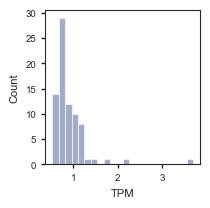

In [482]:
plt.figure(figsize=(2, 2))
ax = sns.histplot(test['change'], color=npg_palette2[0])
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
plt.xlabel('TPM', size=8)
plt.ylabel('Count', size=8)
plt.savefig("overlap_expr_fold_ef.svg", dpi=300)

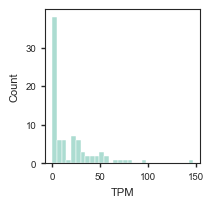

In [483]:
plt.figure(figsize=(2, 2))
ax = sns.histplot(test['bac'], bins=30, color=npg_palette2[1])
ax.tick_params(axis='both', which='both', direction='out', length=3, width=1, labelsize=7)
plt.xlabel('TPM', size=8)
plt.ylabel('Count', size=8)
plt.savefig("overlap_expr_ef.svg", dpi=300)

In [464]:
test.describe()

/Users/cong/opt/anaconda3/envs/research_py39/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Start,End,Coverage,FPKM,TPM,TPM.1,TPM.2,TPM.3,TPM.4,TPM.5,TPM.6,TPM.7,TPM.8,ut,bac,change
count,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,79.00
mean,13514697.89,13553021.87,30.37,12.06,23.45,22.76,26.65,26.39,22.89,22.83,23.00,23.08,20.68,24.29,22.26,inf
std,8077391.46,8068174.69,41.94,15.38,29.90,29.08,34.43,34.38,29.48,29.00,30.65,29.91,27.45,31.00,29.15,NaN
min,1012779.00,1046040.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7463570.25,7528573.50,1.43,0.55,1.07,0.77,0.94,0.76,0.77,0.85,0.86,0.73,0.67,1.00,0.63,0.82
50%,11908667.50,11926475.00,8.37,5.82,11.31,11.60,10.23,9.80,10.19,10.45,8.15,9.24,8.62,11.25,8.77,0.90
75%,19982494.25,19986169.75,42.06,16.62,32.31,32.05,39.70,39.85,37.17,30.66,32.78,33.49,30.20,34.76,32.12,0.96
max,30765926.00,30789202.00,209.50,68.19,132.59,133.59,133.10,130.79,134.07,129.22,132.41,130.48,158.00,133.09,140.30,inf


In [1]:
dmel_cand_df.describe()

NameError: name 'dmel_cand_df' is not defined